In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.strategy.indicators.notebook_utils import fetchIndicators, genDataForAll, generateSpans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [3]:


def filter_optimal(optimal):
    if optimal > 0.75:
        return 1.0
    # elif optimal < -0.99:
    #     return -1.0
    else:
        return 0.0


model = Trading(load_config('config.hjson'))

dataset_list = []
for g,n in model.df_groups:
    print(n)
    for d in g:
        features = ["volume", "RSI", "slowk", "slowd"]
        cur_dataset = d
        my_inds = fetchIndicators(["rsi", "macd", "stochastic_oscillator", "optimal_v2"], param_specification={
            'macd.signal': 360,
            'macd.ema_slow': 480,
            'macd.ema_fast': 240,
            'ema.period': 360,
            'sma.period': 360,
            'stochastic_oscillator.highlow': 360,
            'stochastic_oscillator.k': 1080,
            'rsi.period': 360,
            'bollinger_bands.period': 360
        })
        genDataForAll(cur_dataset, my_inds)
        # cur_dataset.dropna(inplace=True)
        features.extend(generateSpans(cur_dataset, 'roc', 'RSI', 'period', [1,5,10,60]))
        features.extend(generateSpans(cur_dataset, 'roc', 'MACD', 'period', [1,5,10,60]))
        features.extend(generateSpans(cur_dataset, 'roc', 'close', 'period', [1,5,10,60]))
        
        # roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='RSI_5')
        # roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='RSI_1')
        # roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='RSI_10')
        # roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='RSI_60')
        # roc_1.genData(cur_dataset, gen_new_values=False, value='RSI')
        # roc_5.genData(cur_dataset, gen_new_values=False, value='RSI')
        # roc_10.genData(cur_dataset, gen_new_values=False, value='RSI')
        # roc_60.genData(cur_dataset, gen_new_values=False, value='RSI')
        # roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='MACD_5')
        # roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='MACD_1')
        # roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='MACD_10')
        # roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='MACD_60')
        # roc_1.genData(cur_dataset, gen_new_values=False, value='MACD')
        # roc_5.genData(cur_dataset, gen_new_values=False, value='MACD')
        # roc_10.genData(cur_dataset, gen_new_values=False, value='MACD')
        # roc_60.genData(cur_dataset, gen_new_values=False, value='MACD')
        # roc_5 = RateOfChange(_params=[Param(0,0,0,'period', 5)], _appended_name='close_5')
        # roc_1 = RateOfChange(_params=[Param(0,0,0,'period', 1)], _appended_name='close_1')
        # roc_10 = RateOfChange(_params=[Param(0,0,0,'period',10)], _appended_name='close_10')
        # roc_60 = RateOfChange(_params=[Param(0,0,0,'period', 60)], _appended_name='close_60')
        # roc_1.genData(cur_dataset, gen_new_values=False, value='close')
        # roc_5.genData(cur_dataset, gen_new_values=False, value='close')
        # roc_10.genData(cur_dataset, gen_new_values=False, value='close')
        # roc_60.genData(cur_dataset, gen_new_values=False, value='close')
        cur_dataset['optimal'] = cur_dataset.apply(lambda x: filter_optimal(x.optimal), axis=1)
        q_scalar = QuantileTransformer(n_quantiles=200)

        cur_dataset.dropna(inplace=True)
        cur_dataset[features] = q_scalar.fit_transform(cur_dataset[features])
        dataset_list.append(cur_dataset)
        break

        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




BTCUSDT-1m
roc 1 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 5 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 10 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 60 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 1 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 5 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 10 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 60 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 1 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 5 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 10 period <class 'v2.strategy.indicators.roc.RateOfChange'>
roc 60 period <class 'v2.strategy.indicators.roc.RateOfChange'>


In [4]:
cur_dataset

,time,high,low,close,open,volume,RSI,MACD,MACD_signal,MACD_hist,...,RateOfChange_RSI_period_10,RateOfChange_RSI_period_60,RateOfChange_MACD_period_1,RateOfChange_MACD_period_5,RateOfChange_MACD_period_10,RateOfChange_MACD_period_60,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,RateOfChange_close_period_60
1297,1503020399999,4202.73,4202.73,4211.167929,4202.73,0.412933,0.034232,-10.234731,-5.533560,-4.701170,...,-0.005717,-0.044688,0.013202,0.054951,0.118415,1.297851,-0.002000,-0.002559,-0.000731,-0.022709
1298,1503020459999,4202.73,4202.73,4206.948965,4202.73,0.000000,0.034232,-10.366138,-5.564146,-4.801992,...,-0.005717,-0.044688,0.012839,0.057717,0.117726,1.326769,-0.001002,-0.003680,-0.001818,-0.023703
1299,1503020519999,4221.87,4221.87,4214.409482,4221.87,0.495093,0.053409,-10.457229,-5.595115,-4.862114,...,0.004869,-0.034516,0.008787,0.056517,0.112978,1.346714,0.001773,-0.001974,-0.000090,-0.021979
1300,1503020579999,4221.87,4221.87,4218.139741,4221.87,0.403246,0.053409,-10.546867,-5.626455,-4.920412,...,0.000461,-0.033631,0.008572,0.055355,0.110284,1.364892,0.000885,-0.001121,-0.000179,-0.020954
1301,1503020639999,4231.61,4221.87,4224.874871,4221.87,0.359510,0.066028,-10.615534,-5.658032,-4.957502,...,0.005775,-0.028498,0.006511,0.050900,0.105645,1.378448,0.001597,0.001249,0.000930,-0.019311
1302,1503020699999,4231.61,4212.65,4228.242435,4212.65,0.844688,0.066028,-10.683010,-5.689835,-4.993174,...,0.005775,-0.025015,0.006356,0.043800,0.101158,1.385854,0.000797,0.004055,0.001485,-0.017855
1303,1503020759999,4238.89,4231.61,4229.926218,4231.61,0.345343,0.066028,-10.749307,-5.721857,-5.027449,...,0.005775,-0.012703,0.006206,0.036964,0.096814,1.372323,0.000398,0.005462,0.001762,-0.014878
1304,1503020819999,4231.61,4231.61,4230.768109,4231.61,0.417231,0.066028,-10.814437,-5.754089,-5.060348,...,0.005775,-0.025492,0.006059,0.034159,0.092607,1.379711,0.000199,0.003882,0.001900,-0.015638
1305,1503020879999,4238.88,4238.88,4234.824054,4238.88,0.311878,0.077618,-10.863832,-5.786429,-5.077403,...,0.009747,-0.021644,0.004568,0.030053,0.087071,1.383770,0.000959,0.003955,0.002830,-0.015172
1306,1503020939999,4238.88,4238.88,4236.852027,4238.88,0.399137,0.077618,-10.912259,-5.818871,-5.093388,...,0.013120,-0.019474,0.004458,0.027952,0.080275,1.384086,0.000479,0.002835,0.004087,-0.014537


In [5]:
final_dataset = pd.concat(dataset_list)

In [6]:
dataset_list = []

In [7]:
final_dataset

,time,high,low,close,open,volume,RSI,MACD,MACD_signal,MACD_hist,...,RateOfChange_RSI_period_10,RateOfChange_RSI_period_60,RateOfChange_MACD_period_1,RateOfChange_MACD_period_5,RateOfChange_MACD_period_10,RateOfChange_MACD_period_60,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,RateOfChange_close_period_60
1297,1503020399999,4202.73,4202.73,4211.167929,4202.73,0.412933,0.034232,-10.234731,-5.533560,-4.701170,...,-0.005717,-0.044688,0.013202,0.054951,0.118415,1.297851,-0.002000,-0.002559,-0.000731,-0.022709
1298,1503020459999,4202.73,4202.73,4206.948965,4202.73,0.000000,0.034232,-10.366138,-5.564146,-4.801992,...,-0.005717,-0.044688,0.012839,0.057717,0.117726,1.326769,-0.001002,-0.003680,-0.001818,-0.023703
1299,1503020519999,4221.87,4221.87,4214.409482,4221.87,0.495093,0.053409,-10.457229,-5.595115,-4.862114,...,0.004869,-0.034516,0.008787,0.056517,0.112978,1.346714,0.001773,-0.001974,-0.000090,-0.021979
1300,1503020579999,4221.87,4221.87,4218.139741,4221.87,0.403246,0.053409,-10.546867,-5.626455,-4.920412,...,0.000461,-0.033631,0.008572,0.055355,0.110284,1.364892,0.000885,-0.001121,-0.000179,-0.020954
1301,1503020639999,4231.61,4221.87,4224.874871,4221.87,0.359510,0.066028,-10.615534,-5.658032,-4.957502,...,0.005775,-0.028498,0.006511,0.050900,0.105645,1.378448,0.001597,0.001249,0.000930,-0.019311
1302,1503020699999,4231.61,4212.65,4228.242435,4212.65,0.844688,0.066028,-10.683010,-5.689835,-4.993174,...,0.005775,-0.025015,0.006356,0.043800,0.101158,1.385854,0.000797,0.004055,0.001485,-0.017855
1303,1503020759999,4238.89,4231.61,4229.926218,4231.61,0.345343,0.066028,-10.749307,-5.721857,-5.027449,...,0.005775,-0.012703,0.006206,0.036964,0.096814,1.372323,0.000398,0.005462,0.001762,-0.014878
1304,1503020819999,4231.61,4231.61,4230.768109,4231.61,0.417231,0.066028,-10.814437,-5.754089,-5.060348,...,0.005775,-0.025492,0.006059,0.034159,0.092607,1.379711,0.000199,0.003882,0.001900,-0.015638
1305,1503020879999,4238.88,4238.88,4234.824054,4238.88,0.311878,0.077618,-10.863832,-5.786429,-5.077403,...,0.009747,-0.021644,0.004568,0.030053,0.087071,1.383770,0.000959,0.003955,0.002830,-0.015172
1306,1503020939999,4238.88,4238.88,4236.852027,4238.88,0.399137,0.077618,-10.912259,-5.818871,-5.093388,...,0.013120,-0.019474,0.004458,0.027952,0.080275,1.384086,0.000479,0.002835,0.004087,-0.014537


In [8]:
# import joblib

# joblib.dump(mm_scalar, './mm_scalar.sav')

In [9]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [10]:

buy_signals = train[train['optimal'] == 1.0]

In [11]:
mean_num_singals = int(len(buy_signals))

In [12]:
not_signals = train[train['optimal'] == 0.0]


In [13]:
print(mean_num_singals, len(not_signals))

6028 160950


In [14]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [15]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [16]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]




balanced_data_optimal_buy = balanced_data_buy[['optimal']]
balanced_data_buy = []



In [17]:
filtered_balanced_data_buy

,volume,RSI,slowk,slowd
37841,0.633312,0.223797,0.154690,0.619384
84151,0.301899,0.504758,0.639268,0.699279
143610,0.589674,0.509043,0.281337,0.502454
32442,0.330303,0.289287,0.237108,0.135559
37692,0.363486,0.245420,0.357551,0.874015
103235,0.756103,0.242636,0.746806,0.306696
98046,0.672823,0.139343,0.367496,0.238145
162453,0.995835,0.417780,0.697026,0.867700
124844,0.805821,0.053257,0.179079,0.188430
111558,0.545460,0.628143,0.403948,0.424569


In [18]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [19]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [20]:
import pickle

In [21]:
filtered_test = test[["close", 'optimal', 'volume']]
filtered_test_2 = test[features]

In [22]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [23]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [24]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [25]:
len(filtered_test)

8789

In [26]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

37

In [27]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.optimal), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [28]:
first_amnt

NameError: name 'first_amnt' is not defined

In [80]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [81]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


In [82]:
reset_filtered = filtered_test.reset_index(drop=True)

In [83]:
# reset_filtered

In [84]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [85]:
# reset_filtered

In [99]:
first_amnt = reset_filtered[56000:60000]
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

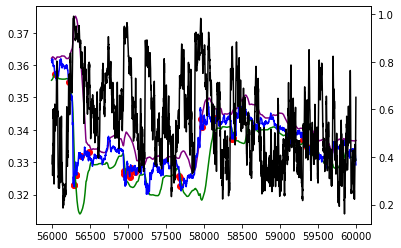

<Figure size 1440x720 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt
plt.clf()
fig, ax1 = plt.subplots()

plt.figure(figsize=(20,10))
ax1.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')
ax1.plot(first_amnt.index, first_amnt['boll_lower'], color='green')
ax1.plot(first_amnt.index, first_amnt['boll_upper'], color='purple')
ax2 = ax1.twinx()
ax2.plot(first_amnt.index, first_amnt['volume'], color='black')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

ax1.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [101]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()